# Bacterial Population Growth Simulator 

## In a Spatial Structured Environment with Antibiotic Diffusion

### Model

In [1]:
using ODE

include("Model.jl")
;

### Initial Conditions

We declare the data types.

In [2]:
ant = 0:0.001:3
DR_len = length(ant)

exp_vect = Array{Float64,2}(4,DR_len)
exp_time = 0:0.1:23

for i=1:DR_len
    exp_vect[:,i] = ode23(f,[5e5,5e5,ant[i],2000],exp_time)[2][end]
end

We plot the growth of each strain

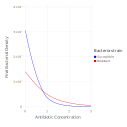

In [3]:
using Gadfly

a = exp_vect[3,:] 
bs = exp_vect[1,:] 
br = exp_vect[2,:] 

p = plot(layer(x=a, y=bs,Geom.smooth,Theme(default_color=colorant"blue")),
layer(x=a, y=br, Geom.smooth, Theme(default_color=colorant"red")),
Guide.xlabel("Antibiotic Concentration"),Guide.ylabel("Final Bacterial Density"),
    Guide.manual_color_key("Bacteria strain",
["Suceptible","Resistant"],
[colorant"blue",colorant"red"]))

dir = "../plots/model_1/"
draw(SVGJS(string(dir,"StrainsG.svg"),5inch, 5inch),p)
draw(SVGJS(5inch,5inch),p)

Ploteamos el fitness relativo con respecto a la concentración inicial de antibiótico en el microambiente.

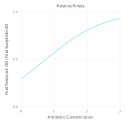

In [4]:
FRF = [br[i]/(br[i]+bs[i]) for i=1:DR_len]

p = plot(x = a, y = FRF, Geom.smooth,
    Guide.xlabel("Antibiotic Concentration"),
Guide.ylabel("Final Resistant OD / Final Suceptible OD"),
Guide.Title("Relative fitness"))
draw(SVGJS(string(dir,"RelativeFitness.svg"),5inch, 5inch),p)
draw(SVGJS(5inch,5inch),p)

In [17]:
tmp = FRF[1]
a_index = 0
for i=1:DR_len
    if(FRF[i] <= 0.501 && FRF[i]>tmp)
        tmp = FRF[i]
        a_index = i
    end
end

print("Concentración de antibiótico para punto de inflexión: ", exp_vect[3,a_index])

Concentración de antibiótico para punto de inflexión: 0.765

We plot them again but with the  turnover value included

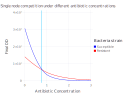

In [18]:
p = plot(layer(x=a, y=bs,Geom.smooth,Theme(default_color=colorant"blue")),
layer(x=a, y=br, Geom.smooth, Theme(default_color=colorant"red")),
Guide.xlabel("Antibiotic Concentration"),Guide.ylabel("Final OD"),
Guide.title("Single node competition under different antibiotic concentrations"), Guide.manual_color_key("Bacteria strain", 
["Suceptible","Resistant"],
[colorant"blue",colorant"red"]),
xintercept=[exp_vect[3,a_index]],Geom.vline)
draw(SVGJS(string(dir,"RelativeFitness_aast.svg"),10inch, 15inch),p)
draw(SVGJS(5inch,4inch),p)

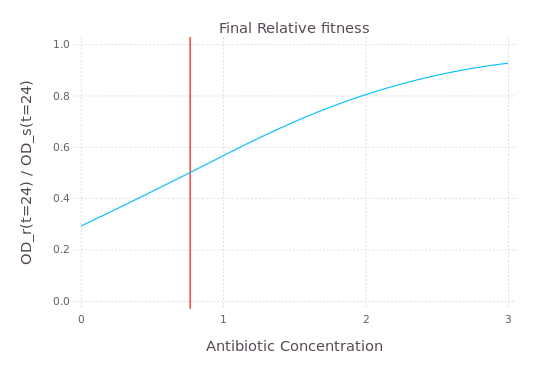

In [30]:
fitness = [br[i]/(br[i]+bs[i]) for i in eachindex(br)]

plot(x = a, y = fitness, Geom.smooth,
    Guide.xlabel("Antibiotic Concentration"),
    Guide.ylabel("OD_r(t=24) / OD_s(t=24)"),
Guide.Title("Final Relative fitness"),
xintercept=[exp_vect[3,a_index]],Geom.vline(color=colorant"red"))